## Part 2

In [48]:
import pandas as pd

# Define the model properties
model_properties = {
    "Model": ["Decision Tree", "Naive Bayes", "K-Nearest Neighbour", "Logistic Regression", "SVM"],
    "Parametric or Non-parametric": ["Non-parametric", "Parametric", "Non-parametric", "Parametric", "Non-Parametric"],
    "Input": ["Both", "Both", "Both", "Both", "Both"],
    "Output": ["Both", "Discrete", "Discrete", "Discrete", "Discrete"],
    "Handle Missing Value": ["Yes", "Yes", "Yes", "No", "No"],
    "Model Representation": ["Tree", "Probabilities", "Instances", "Equation", "Hyperplane"],
    "Model Parameters": ["Max Depth, Minimum Split Samples", "Prior, Likelihood", "Number of Neighbors", "Weights", "Kernel"],
    "More Complex": ["Decrease Pruning", "Add more features", "Decrease K", "Add Features", "Use complex Kernels"],
    "Less Complex": ["Increase Pruning", "Reduce Features", "Increase K", "Remove Features", "Use simple Kernels"],
    "Interpretable or Transparent": ["Interpretable", "Interpretable", "Non Interpretable", "Interpretable", "Non Interpretable"]
}

# Convert the dictionary to a DataFrame
model_df = pd.DataFrame(model_properties)

model_df


,Model,Parametric or Non-parametric,Input,Output,Handle Missing Value,Model Representation,Model Parameters,More Complex,Less Complex,Interpretable or Transparent
0,Decision Tree,Non-parametric,Both,Both,Yes,Tree,"Max Depth, Minimum Split Samples",Decrease Pruning,Increase Pruning,Interpretable
1,Naive Bayes,Parametric,Both,Discrete,Yes,Probabilities,"Prior, Likelihood",Add more features,Reduce Features,Interpretable
2,K-Nearest Neighbour,Non-parametric,Both,Discrete,Yes,Instances,Number of Neighbors,Decrease K,Increase K,Non Interpretable
3,Logistic Regression,Parametric,Both,Discrete,No,Equation,Weights,Add Features,Remove Features,Interpretable
4,SVM,Parametric,Both,Discrete,No,Hyperplane,Kernel,Use complex Kernels,Use simple Kernels,No


## Part 3

### Python Task 1 (Profiling and saving as HTML)

In [3]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

red_wine_df = pd.read_csv("red_wine.csv")

profile = ProfileReport(red_wine_df, title="Profiling Report")

In [5]:
profile.to_file("red_wine_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Python Task 2

In [7]:
import pandas as pd
wine_data = pd.read_csv('red_wine.csv')

wine_data.head()

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

X = wine_data.drop(columns=['type'])
y = wine_data['type']

models = {
    'Baseline': None,
    'LR': LogisticRegression(),
    'NB': GaussianNB(),
    'DT': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'RF': RandomForestClassifier()
}

results = {'Model': [], 'AUC': [], 'Accuracy': []}
for model_name, model in models.items():
    if model_name == 'Baseline':
        baseline_accuracy = (y.value_counts() / len(y)).max()
        results['Model'].append(model_name)
        results['AUC'].append(0.5)  # Baseline AUC is 0.5
        results['Accuracy'].append(baseline_accuracy)
    else:
        auc_scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
        accuracy_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
        
        results['Model'].append(model_name)
        results['AUC'].append(auc_scores.mean())
        results['Accuracy'].append(accuracy_scores.mean())

results_df = pd.DataFrame(results)
print(results_df)


      Model       AUC  Accuracy
0  Baseline  0.500000  0.528897
1        LR  0.879902  0.784785
2        NB  0.895408  0.821627
3        DT  0.738499  0.760254
4       SVM  0.868920  0.535844
5        RF  0.889864  0.798851


### Question 3

In [35]:
%matplotlib inline

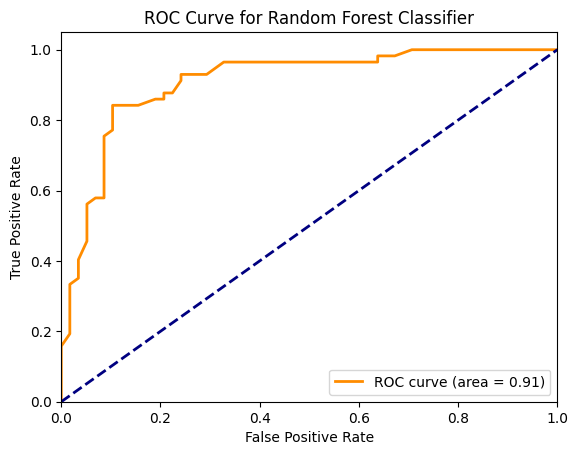

In [45]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
rf_classifier = models['RF']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob,pos_label='low')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

### Question 4

In [46]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

white_wine_df = pd.read_csv("white_wine.csv")

white_wine_df['type_encoded'] = white_wine_df['type'].map({'low': 0, 'high': 1})

X_white = white_wine_df[['citric acid', 'sulphates', 'alcohol']]
y_white = white_wine_df['type_encoded']

nb_model = GaussianNB()
nb_model.fit(X_red, y_red)

y_white_prob_nb = nb_model.predict_proba(X_white)[:, 1]

white_auc_nb = roc_auc_score(y_white, y_white_prob_nb)
print("ROC Auc score is: ",white_auc_nb)

ROC Auc score is:  0.9488910318225652


### Question 5

Based on the performance metrics I observed for the red-wine.csv dataset, it's clear that the Naïve Bayes (NB) model stood out with the highest AUC score (0.895408) and accuracy (0.821627) during our 10-fold cross-validation experiment. So i used Naive Bayes to get the auc score for white-wine csv

Interestingly, when I used the Naïve Bayes model on the white-wine.csv dataset, I was surprised to find that it achieved AUC score of 0.9489. This score is higher than its performance on the red-wine.csv dataset, suggesting that the Naïve Bayes model may generalize well to the white-wine dataset.

Now, when it comes to selecting a model to provide insights to wine-tasting experts, assuming all models have similar performance, I'd consider the 'decision-making' factor. Decision Tree (DT) and Naïve Bayes (NB) models tend to be more 'understandable' compared to ensemble models like Random Forest (RF) or complex models like Support Vector Machine (SVM).

So, if I were to choose a model for the experts to gain insights from, I'd lean towards the Decision Tree or Naïve Bayes models. These models can offer more transparent explanations of how they arrive at their predictions, which can be incredibly valuable for experts seeking to understand the key factors influencing wine quality.